**DSCI 100 <br>
Individual Project Planning <br>
Section 009 <br>
Max Chung <br>**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
player_data <- read_csv("https://raw.githubusercontent.com/maxlbchung/dsci-100-project/refs/heads/main/Project/data/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [ ]:
#experience
print("pro count")
player_data |>
    select(experience) |>
    filter(experience == "Pro") |>
    nrow()

print("veteran count")
player_data |>
    select(experience) |>
    filter(experience == "Veteran") |>
    nrow()

print("regular count")
player_data |>
    select(experience) |>
    filter(experience == "Regular") |>
    nrow()

print("amateur count")
player_data |>
    select(experience) |>
    filter(experience == "Amateur") |>
    nrow()

print("beginner count")
player_data |>
    select(experience) |>
    filter(experience == "Beginner") |>
    nrow()

#subscribed
print("subscribed count")
player_data |>
    select(subscribe) |>
    filter(subscribe == TRUE) |>
    nrow()

print("not subscribed count")
player_data |>
    select(subscribe) |>
    filter(subscribe == FALSE) |>
    nrow()

In [39]:
#means
print("mean values:")
mean_table <- player_data |>
    select(played_hours, Age) |>
    summarise(mean_played_hours = mean(played_hours),
                                    mean_age = mean(Age, na.rm = TRUE))

mean_table

[1] "mean values:"


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


## (1) Data Description

players.csv

1. "experience" (character) - describes player as a "beginner", "amateur", "veteran", or "pro"
2. "subscribe" (boolean) - whether or not the player is subscribed to a game-related newsletter
3. "hashedEmail" (character) - hashed email to protect player privacy
4. "played_hours" (double) - number of hohurs the player has played on the minecraft server - mean = 5.8 hours
5. "name" (character) - player name
6. "gender" (character) - (male, female, non-binary, etc)
7. "Age" (double) - player age - mean = 21.1 years

A few things to look out for when analyzing this dataset and using it to train the k-nearest neighbors model is that the Age column contains NA values, and that the Gender column is not limited to only "Male" and "Female" options. Some potential issues when training the k-nearest-neighbors model with the age and playtime variables is that the observations for them are not evenly distributed. Playtime has no data around 100 hours, with almost all the players having fewer than 50 hours of playtime. Age has the same problem, with very few observations of people in their early 30s. This will cause the k-nearest neighbors model to not be very accurate when classifying observations in these ranges.

## (2) Questions

Broad Question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Can played hours and age predict whether or not a male player will subscribe to a to a game-related newsletter in the players dataset? I will train a k-nearest neighbors model from the "players.csv" file to help me address this point of interest. By filtering for male players and selecting the columns "played_hours", "Age" to predict the "subscribe" variable, I can determine whether or not played hours and age can predict whether or not a male player will subscribe to a game-related newsletter.

## (3) Exploratory Data Analysis and Visualization

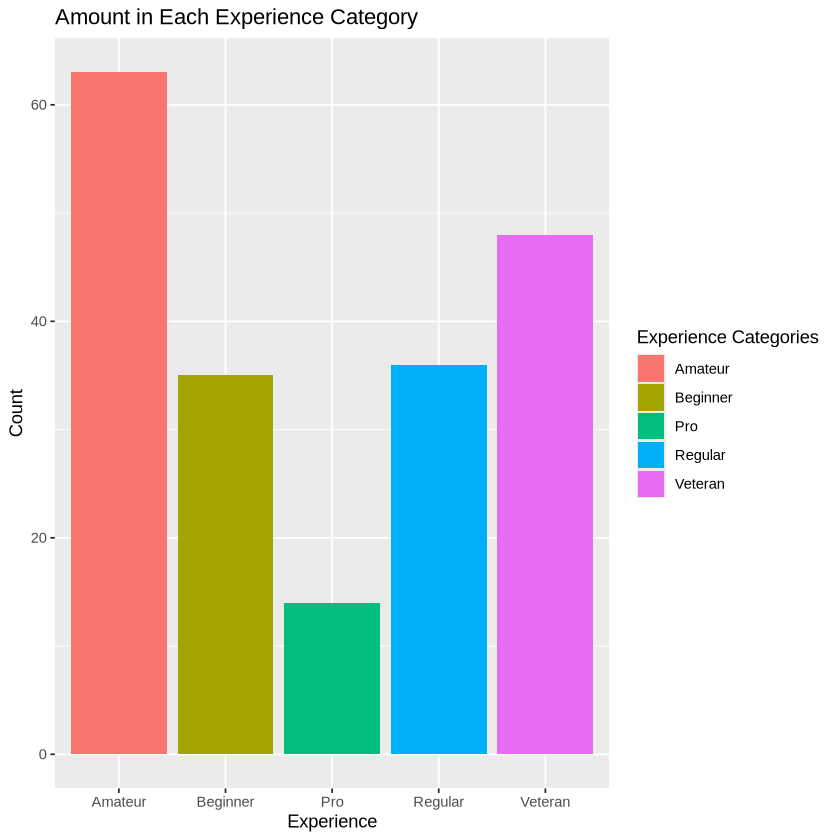

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


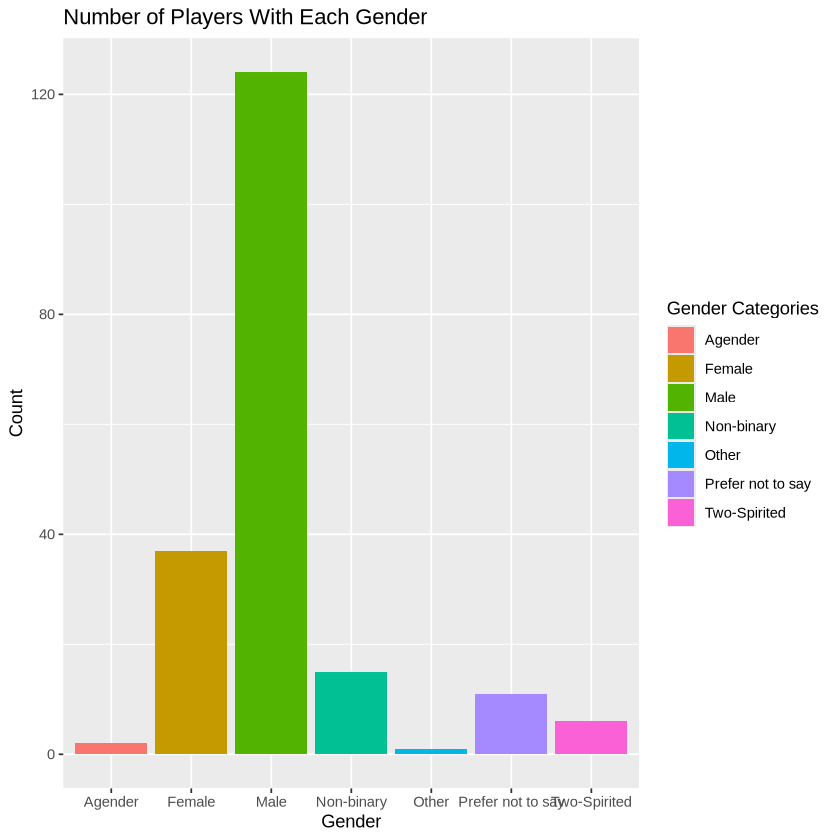

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


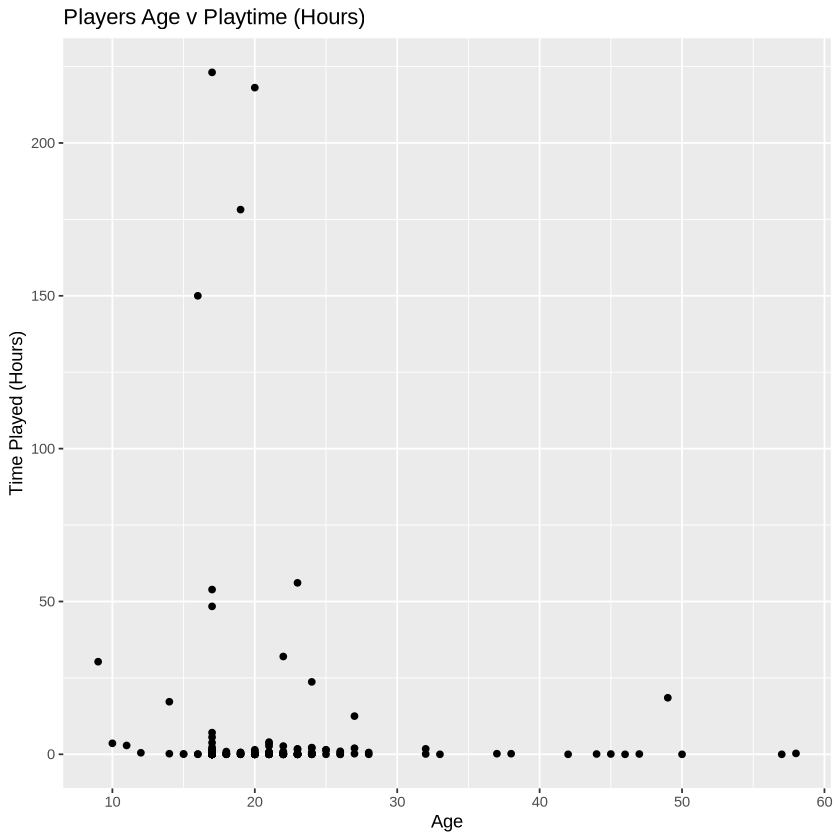

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


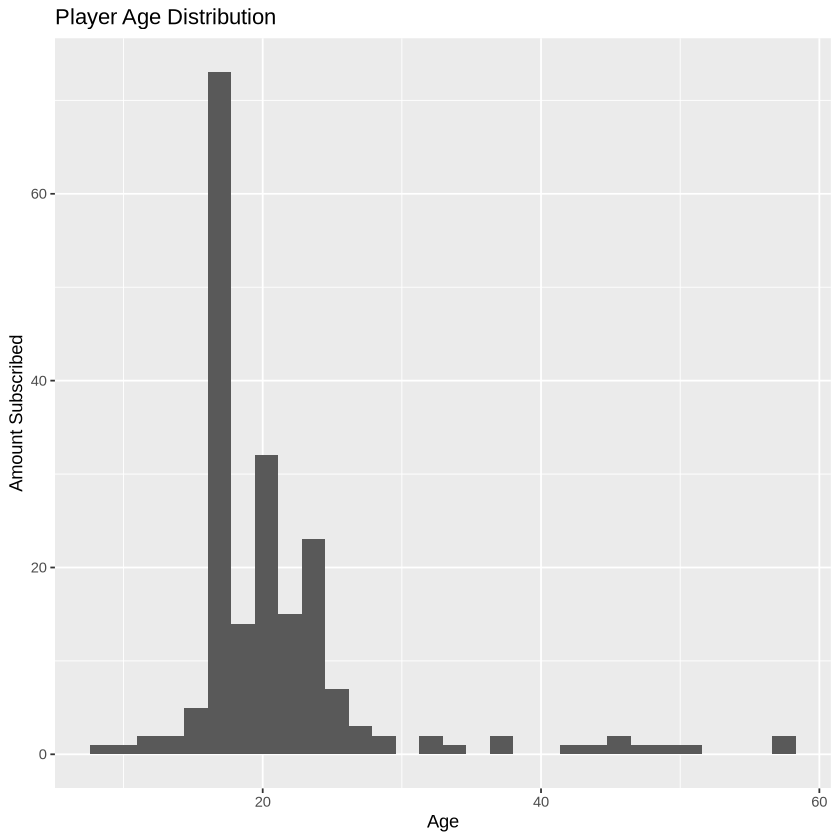

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


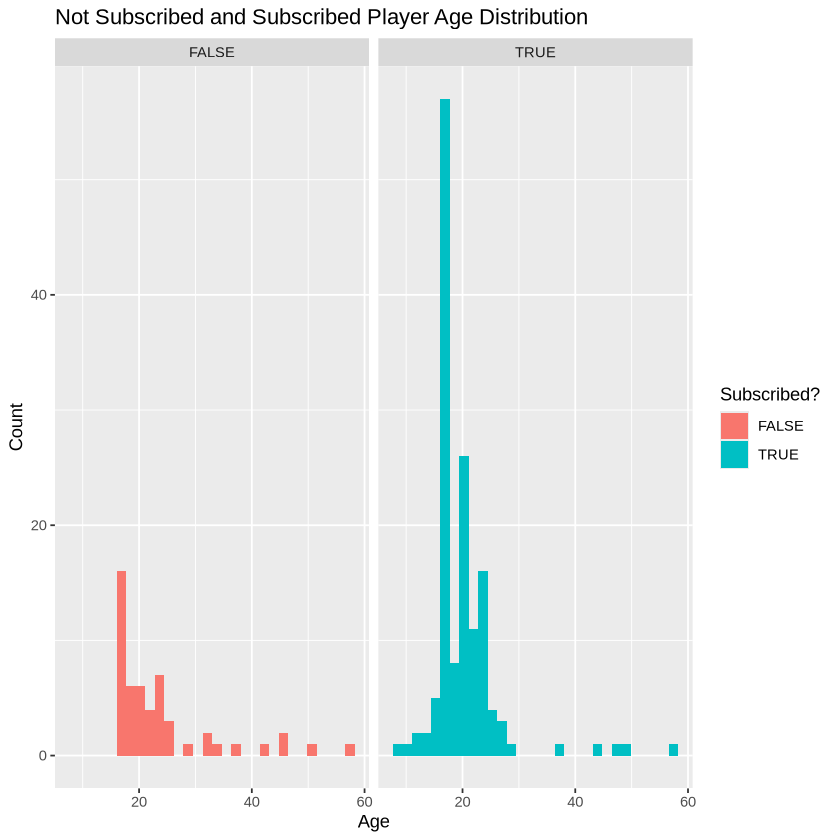

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


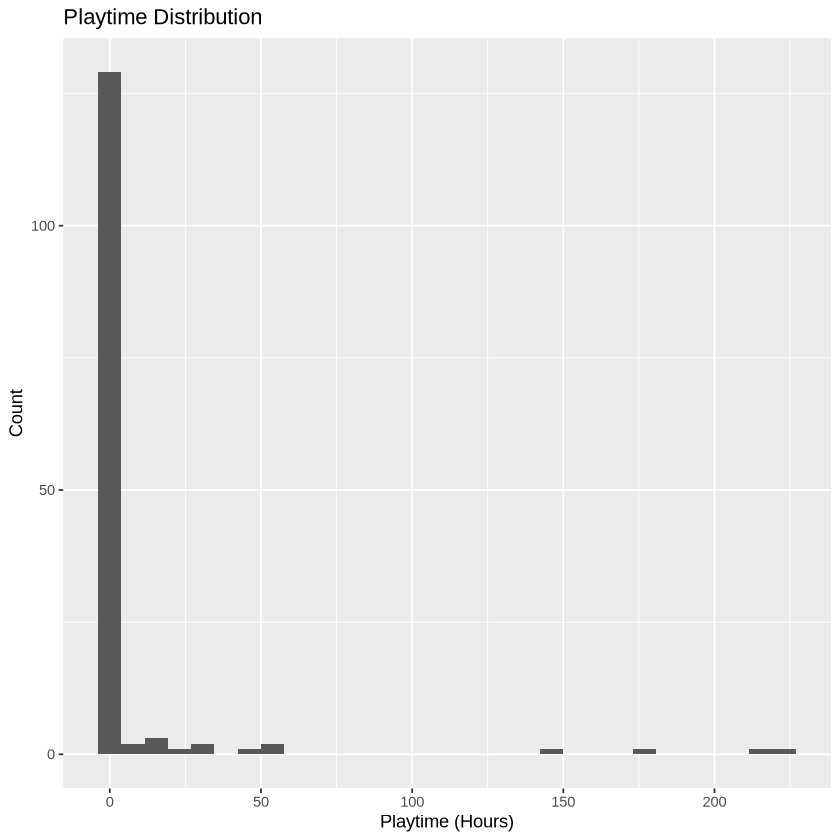

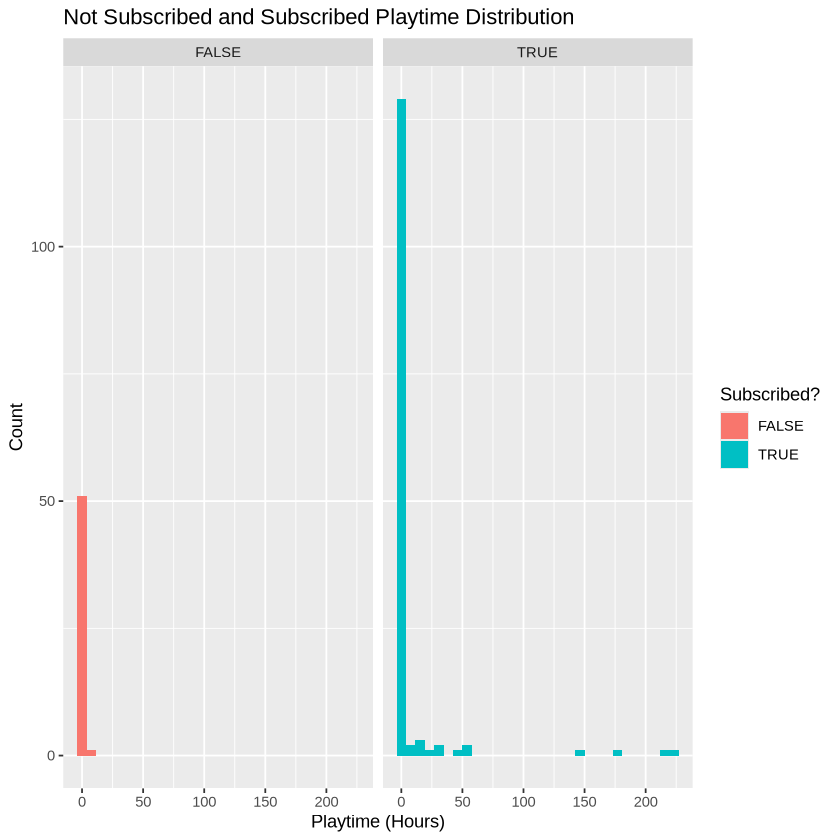

In [41]:
experience_bar <- player_data |>
    select(experience) |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(x = "Experience", y = "Count", fill = "Experience Categories", title = "Amount in Each Experience Category")

gender_bar <- player_data |>
    select(gender) |>
    ggplot(aes(x = gender, fill = gender)) +
    geom_bar() +
    labs(x = "Gender", y = "Count", fill = "Gender Categories", title = "Number of Players With Each Gender")

age_time_plot <- player_data |>
    select(Age, played_hours) |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age", y = "Time Played (Hours)", title = "Players Age v Playtime (Hours)")

age_dist_plot <- player_data |>
    select(Age) |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(x = "Age", y = "Amount Subscribed", title = "Player Age Distribution")

sub_age_plot <- player_data |>
    select(Age, subscribe) |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    facet_wrap(~ subscribe, ncol = 2) +
    labs(x = "Age", y = "Count", fill = "Subscribed?", title = "Not Subscribed and Subscribed Player Age Distribution")


time_plot <- player_data |>
    filter(subscribe == TRUE) |>
    select(played_hours) |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs(x = "Playtime (Hours)", y = "Count", title = "Playtime Distribution")

sub_time_plot <- player_data |>
    select(played_hours, subscribe) |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram() +
    facet_wrap(~ subscribe, ncol = 2) +
    labs(x = "Playtime (Hours)", y = "Count", fill = "Subscribed?", title = "Not Subscribed and Subscribed Playtime Distribution")

experience_bar
gender_bar
age_time_plot
age_dist_plot
sub_age_plot
time_plot
sub_time_plot

## (4) Methods and Plan

To answer the first half of the broad question, we should train models on every numerical column ("played_hours" and "Age") with k-nearest neighbors, since we are classifying whether or not a player is subscribed. To find which variables are best at predicting, we can compare their accuracy values. We will start off by training models on "played_hours" and "Age" seperately. Before training the models, we will split the data in half into training and testing sets and chose the K value by accuracy with a 10-fold cross-fold validation. We will then train the model on the training data with the ideal K value we determined earlier and test its accuracy on the testing data. We do this once for each variable and compare their accuracies.

For the 2nd half of the question, we can repeate the process, but filter the data for different player types ("gender", "experience", etc.). After training the models and getting their accuracies, we can see how the importance of each predictive variable changes based on which group of players you are performing the regression on.

## (5) Github
https://github.com/maxlbchung/dsci-100-project/tree/main